<a href="https://colab.research.google.com/github/bchiramani/Python/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn
Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. This model performs best with normalized inputs. sklearn.preprocessing.StandardScaler will perform z-score normalization .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


# Load the dataset

In [ ]:
data = np.loadtxt("/content/houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]
X_features = ['size(sqft)','bedrooms','floors','age']

In [ ]:
X_train

array([[1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
       [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
       [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
       [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
       [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
       [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
       [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
       [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
       [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
       [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
       [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
       [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
       [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
       [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
       [1.768e+03, 3.000e+00, 2.000e+00, 1.800e+01],
       [1.040e+03, 3.000e+00, 1.000e+00, 4.400

# Scale/normalize the training data

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


# Create and fit the regression model

In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 118, number of weight updates: 11683.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.08579413 -20.96856689 -32.36811416 -38.08275171], b:[363.17015354]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


# Make predictions

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.14130893 486.03503979 389.72801868 492.19910075]
Target values 
[300.  509.8 394.  540. ]


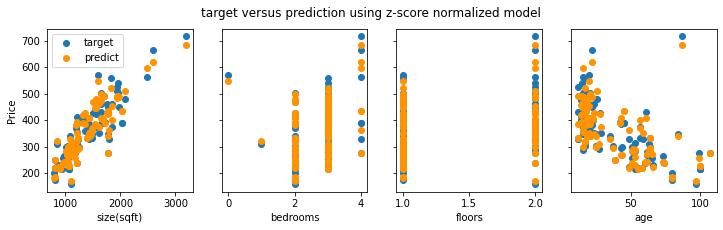

In [ ]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()